In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

### Let's define the ticker symbols for sector ETFs

- XLE: Energy
- XLB: Materials
- XLI: Industrials
- XLY: Consumer Discretionary
- XLP: Consumer Staples
- XLV: Health Care
- XLF: Financials
- XLK: Information Technology
- XLC: Communication Services
- XLU: Utilities
- XLRE: Real Estate

In [2]:
sector_tickers = ['XLE', 'XLB', 'XLI', 'XLY', 'XLP', 'XLV', 'XLF', 'XLK', 'XLC', 'XLU', 'XLRE']

sector_data = yf.download(sector_tickers, 
                          start='2020-01-01', 
                          end='2023-01-01', 
                          progress=False
                          )['Adj Close']

In [3]:
sector_data.head()

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2020-01-02,56.225204,52.538647,50.681396,28.755959,77.958740,90.061394,56.708935,33.790268,56.664711,96.242546,122.825310
2020-01-03,55.317451,52.199753,50.530807,28.450634,77.808479,89.048828,56.618183,34.037815,56.780151,95.403847,121.780067
2020-01-06,55.076614,52.896908,50.924011,28.432131,77.836639,89.260979,56.736160,34.046654,56.833431,95.997528,122.118820
2020-01-07,55.011776,52.964687,50.790154,28.247089,77.676987,89.222412,56.300499,33.675339,56.753513,95.809082,121.925232
2020-01-08,55.206299,53.342323,49.953552,28.432131,77.939949,90.177124,56.509258,33.843311,56.726871,96.431023,122.292999


In [4]:
sector_data.shape

(756, 11)

### Finding the returns

In [5]:
returns_data = sector_data.pct_change()

In [6]:
returns_columns = [col + '_r' for col in sector_data.columns]
returns_data.columns = returns_columns

In [7]:
sector_data_with_returns = pd.concat([sector_data, returns_data], axis=1)

In [8]:
sector_data_with_returns = sector_data_with_returns.dropna()

In [9]:
sector_data_with_returns.head()

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,...,XLC_r,XLE_r,XLF_r,XLI_r,XLK_r,XLP_r,XLRE_r,XLU_r,XLV_r,XLY_r
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,55.317451,52.199753,50.530807,28.450634,77.808479,89.048828,56.618183,34.037815,56.780151,95.403847,...,-0.006450,-0.002971,-0.010618,-0.001927,-0.011243,-0.001600,0.007326,0.002037,-0.008714,-0.008510
2020-01-06,55.076614,52.896908,50.924011,28.432131,77.836639,89.260979,56.736160,34.046654,56.833431,95.997528,...,0.013356,0.007781,-0.000650,0.000362,0.002382,0.002084,0.000260,0.000938,0.006223,0.002782
2020-01-07,55.011776,52.964687,50.790154,28.247089,77.676987,89.222412,56.300499,33.675339,56.753513,95.809082,...,0.001281,-0.002629,-0.006508,-0.002051,-0.000432,-0.007679,-0.010906,-0.001406,-0.001963,-0.001585
2020-01-08,55.206299,53.342323,49.953552,28.432131,77.939949,90.177124,56.509258,33.843311,56.726871,96.431023,...,0.007130,-0.016472,0.006551,0.003385,0.010700,0.003708,0.004988,-0.000469,0.006491,0.003016
2020-01-09,55.410080,53.623112,50.321663,28.607925,78.268654,91.199341,56.908611,33.834465,57.037682,96.845642,...,0.005264,0.007369,0.006183,0.004217,0.011336,0.007067,-0.000261,0.005479,0.004300,0.005302


In [10]:
sector_data_with_returns.shape

(755, 22)

Let's calculate the rolling standard deviation using a 60-day window

In [11]:
sector_data_with_returns.columns

Index(['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV',
       'XLY', 'XLB_r', 'XLC_r', 'XLE_r', 'XLF_r', 'XLI_r', 'XLK_r', 'XLP_r',
       'XLRE_r', 'XLU_r', 'XLV_r', 'XLY_r'],
      dtype='object')

In [12]:
return_columns = sector_data_with_returns.columns[11:]

window_size = 60

for col in return_columns:
    std_col_name = col.replace('_r', '_std') 
    sector_data_with_returns[std_col_name] = sector_data_with_returns[col].rolling(window=window_size).std()

In [13]:
sector_data_with_returns = sector_data_with_returns.dropna()

In [14]:
sector_data_with_returns.head()

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,...,XLC_std,XLE_std,XLF_std,XLI_std,XLK_std,XLP_std,XLRE_std,XLU_std,XLV_std,XLY_std
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-30,42.585854,43.034893,24.479349,19.977016,56.549816,79.393333,50.753426,28.520977,51.787746,84.248093,...,0.033098,0.053503,0.044475,0.039590,0.041104,0.030916,0.039836,0.040170,0.031940,0.034127
2020-03-31,41.998405,42.957214,24.855696,19.426506,55.849449,77.910172,49.721935,27.612434,49.697937,83.878792,...,0.033094,0.053600,0.044564,0.039601,0.041146,0.031013,0.040001,0.040492,0.031929,0.034191
2020-04-01,40.105488,41.248241,23.624031,18.241505,53.331917,74.197395,48.882122,25.937876,46.711220,80.687645,...,0.033367,0.053783,0.045134,0.039935,0.041573,0.031070,0.040692,0.041193,0.032254,0.034590
2020-04-02,40.711605,41.772583,25.787996,18.698711,54.041744,75.932632,50.132713,26.320885,48.173191,82.922409,...,0.033428,0.055390,0.045316,0.040007,0.041704,0.031264,0.040749,0.041422,0.032487,0.034604
2020-04-03,39.732510,40.927814,25.514296,18.325480,53.322456,74.759659,50.525219,26.098204,46.451111,82.174316,...,0.033469,0.055383,0.045322,0.040004,0.041708,0.031280,0.040740,0.041652,0.032481,0.034632


### Compare market risk for 2 periods (last day of March 2020 and 2022) for XL*


In [15]:
std_columns = sector_data_with_returns.columns[22:]

In [16]:
std_columns

Index(['XLB_std', 'XLC_std', 'XLE_std', 'XLF_std', 'XLI_std', 'XLK_std',
       'XLP_std', 'XLRE_std', 'XLU_std', 'XLV_std', 'XLY_std'],
      dtype='object')

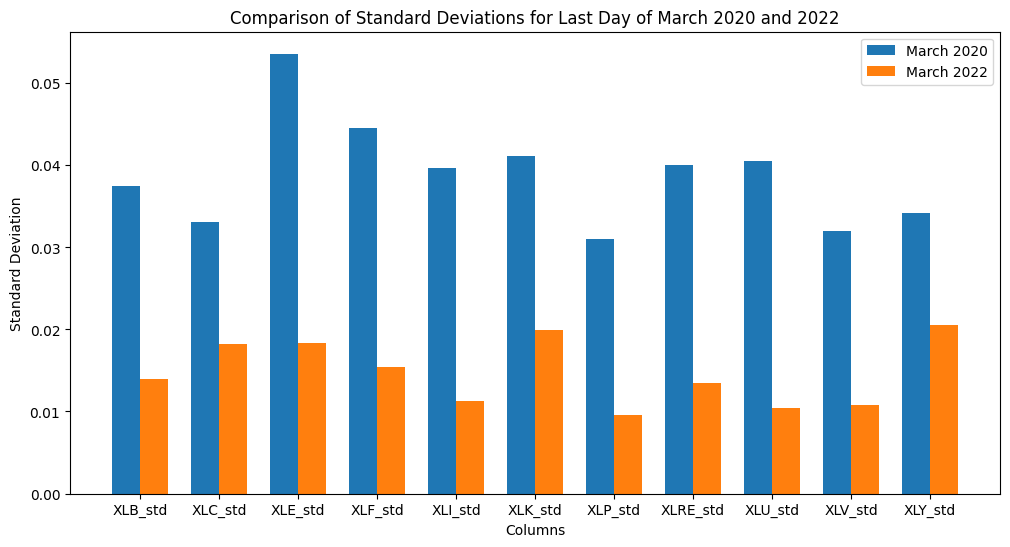

In [17]:
march_2020_data = sector_data_with_returns.loc['2020-03-31', std_columns]
march_2022_data = sector_data_with_returns.loc['2022-03-31', std_columns]

fig, ax = plt.subplots(figsize=(12, 6))

# Set bar width and position
bar_width = 0.35
bar_positions_2020 = range(len(std_columns))
bar_positions_2022 = [pos + bar_width for pos in bar_positions_2020]

ax.bar(bar_positions_2020, march_2020_data, width=bar_width, label='March 2020') # Plot bars for March 2020

ax.bar(bar_positions_2022, march_2022_data, width=bar_width, label='March 2022') # Plot bars for March 2022

# x-axis labels and ticks
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions_2020])
ax.set_xticklabels(std_columns)

ax.set_xlabel('Columns')
ax.set_ylabel('Standard Deviation')
ax.set_title('Comparison of Standard Deviations for Last Day of March 2020 and 2022')

ax.legend()

plt.show()


We can see march of 2022 was less volatile than march of 2020

### diversification – build an equally-weighted portfolio of 11 sectors, calculate portfolio risk, compare it against risk of each portfolio’s component

In [18]:
xl_columns = sector_data_with_returns.columns[:11]
print(len(xl_columns))
print(xl_columns)

11
Index(['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV',
       'XLY'],
      dtype='object')


In [19]:

xl_columns = ['XLB_r', 'XLC_r', 'XLE_r', 'XLF_r', 'XLI_r', 'XLK_r', 'XLP_r', 'XLRE_r', 'XLU_r', 'XLV_r', 'XLY_r']

weights = [1 / len(xl_columns) for _ in xl_columns]

sector_returns = sector_data_with_returns[xl_columns]
portfolio_returns = (sector_returns * weights).sum(axis=1)

rolling_volatility = portfolio_returns.rolling(window=60).std()


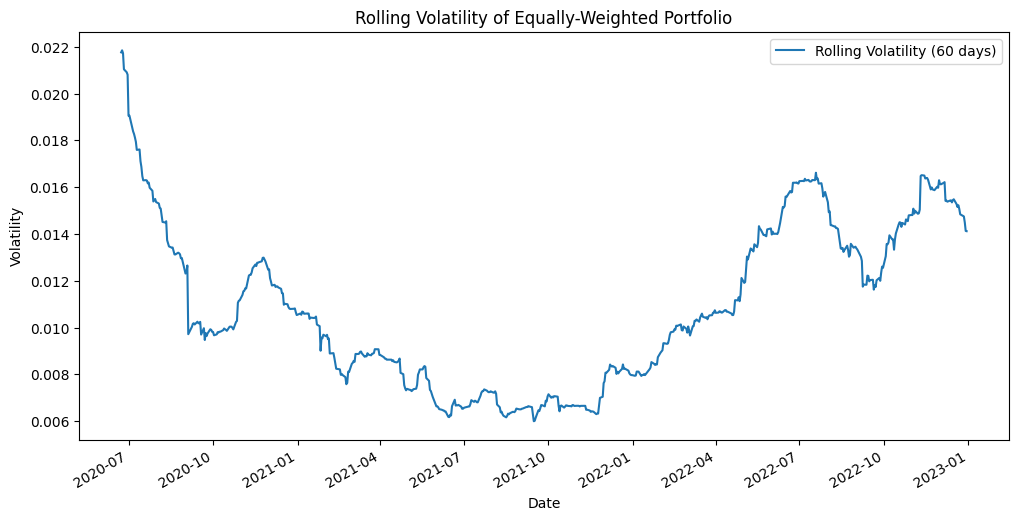

In [20]:
plt.figure(figsize=(12, 6))
rolling_volatility.plot(label='Rolling Volatility (60 days)')
plt.title('Rolling Volatility of Equally-Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [21]:
type(rolling_volatility)

pandas.core.series.Series

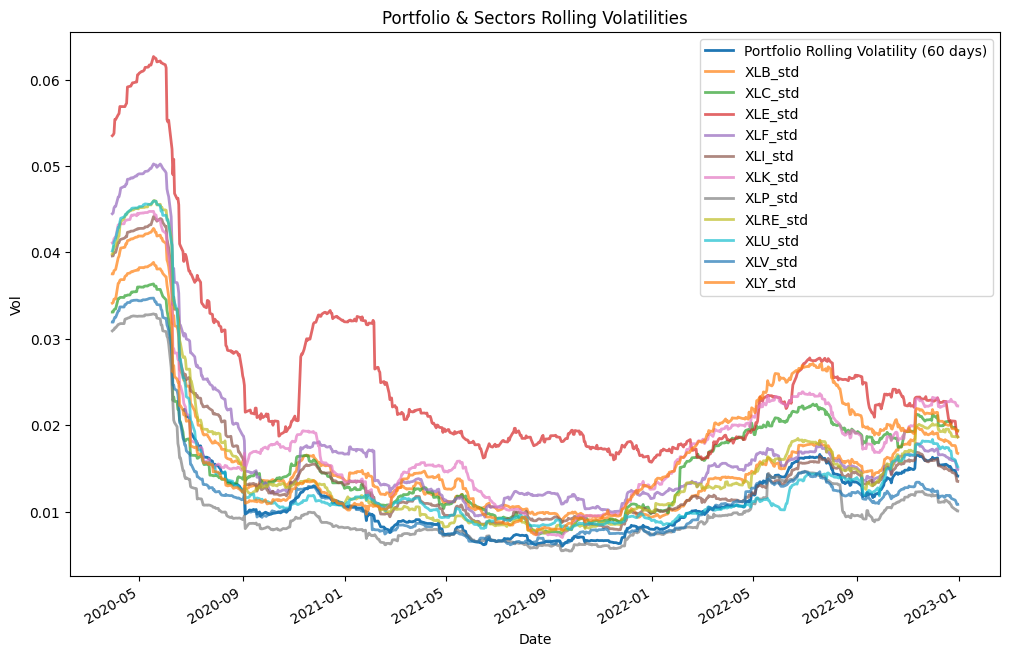

In [22]:
plt.figure(figsize=(12, 8))

rolling_volatility.plot(label='Portfolio Rolling Volatility (60 days)', linewidth=2)

for col in std_columns:
    plt.plot(sector_data_with_returns.index, sector_data_with_returns[col], label=col, alpha=0.7, linewidth=2)


plt.title('Portfolio & Sectors Rolling Volatilities')
plt.xlabel('Date')
plt.ylabel('Vol')

plt.legend()

plt.show()

In [23]:
sector_data_with_returns.columns

Index(['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV',
       'XLY', 'XLB_r', 'XLC_r', 'XLE_r', 'XLF_r', 'XLI_r', 'XLK_r', 'XLP_r',
       'XLRE_r', 'XLU_r', 'XLV_r', 'XLY_r', 'XLB_std', 'XLC_std', 'XLE_std',
       'XLF_std', 'XLI_std', 'XLK_std', 'XLP_std', 'XLRE_std', 'XLU_std',
       'XLV_std', 'XLY_std'],
      dtype='object')

In [24]:
ind = sector_data_with_returns[['XLB_r', 'XLC_r', 'XLE_r', 'XLF_r', 'XLI_r', 'XLK_r', 'XLP_r', 'XLRE_r', 'XLU_r', 'XLV_r', 'XLY_r']]

In [25]:
ind

,XLB_r,XLC_r,XLE_r,XLF_r,XLI_r,XLK_r,XLP_r,XLRE_r,XLU_r,XLV_r,XLY_r
Date,,,,,,,,,,,
2020-03-30,0.031857,0.036483,0.010236,0.019039,0.014604,0.042117,0.039058,0.025953,0.036997,0.046829,0.020908
2020-03-31,-0.013794,-0.001805,0.015374,-0.027557,-0.012385,-0.018681,-0.020324,-0.031855,-0.040353,-0.004383,-0.020180
2020-04-01,-0.045071,-0.039783,-0.049553,-0.060999,-0.045077,-0.047655,-0.016890,-0.060645,-0.060097,-0.038045,-0.044658
2020-04-02,0.015113,0.012712,0.091600,0.025064,0.013310,0.023387,0.025584,0.014766,0.031298,0.027696,0.003735
2020-04-03,-0.024050,-0.020223,-0.010613,-0.019960,-0.013310,-0.015448,0.007829,-0.008460,-0.035748,-0.009022,-0.017437
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.006925,0.009717,0.031883,0.005628,0.005930,0.001044,0.005215,0.008980,0.010258,0.000588,0.006846
2022-12-27,0.000892,-0.008996,0.010682,-0.000295,0.003049,-0.009470,0.004789,-0.000809,0.006205,-0.002572,-0.016225
2022-12-28,-0.015269,-0.014566,-0.022389,-0.003536,-0.013071,-0.016124,-0.012444,-0.015924,-0.009530,-0.006482,-0.008403


In [26]:
def annualize_rets(r, periods_per_year):
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol(r, periods_per_year):
    return r.std()*(periods_per_year**0.5)

def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

In [27]:
sharpe_ratio(ind, 0.03, 365).sort_values()

XLC_r     0.147193
XLRE_r    0.395956
XLY_r     0.419725
XLU_r     0.589119
XLK_r     0.761247
XLF_r     0.939514
XLP_r     1.081329
XLI_r     1.123223
XLB_r     1.197628
XLV_r     1.282438
XLE_r     1.916041
dtype: float64


### Top 5: Energy, Health Care, Materials, Information Technology, Consumer Staples


<Axes: title={'center': 'Industry Sharpe Ratios'}>

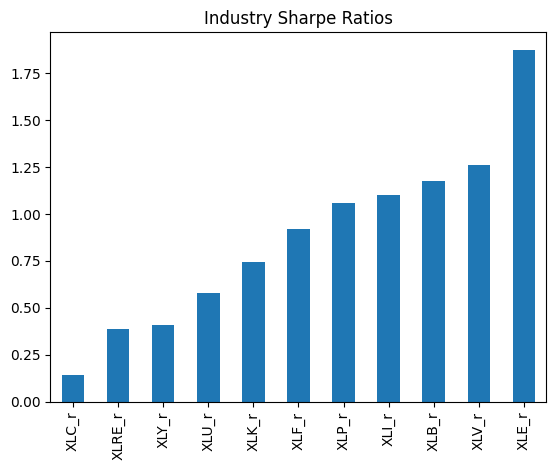

In [28]:
sharpe_ratio(ind, 0.03, 356).sort_values().plot.bar(title="Industry Sharpe Ratios")